In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\dappi\\Downloads\\Zomato data .csv")
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [19]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

data['rate']= data['rate'].apply(handlerate)
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775.0,800,Buffet
1,Spice Elephant,Yes,No,4.1,787.0,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918.0,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,300,Buffet
4,Grand Village,No,No,3.8,166.0,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0.0,100,Dining
144,New Indraprasta,No,No,3.3,0.0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771.0,450,Dining
146,Darbar,No,No,3.0,98.0,800,Dining


In [20]:
data.info

<bound method DataFrame.info of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1  775.0   
1           Spice Elephant          Yes         No   4.1  787.0   
2          San Churro Cafe          Yes         No   3.8  918.0   
3    Addhuri Udupi Bhojana           No         No   3.7   88.0   
4            Grand Village           No         No   3.8  166.0   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3    0.0   
144        New Indraprasta           No         No   3.3    0.0   
145           Anna Kuteera          Yes         No   4.0  771.0   
146                 Darbar           No         No   3.0   98.0   
147          Vijayalakshmi          Yes         No   3.9   47.0   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2         

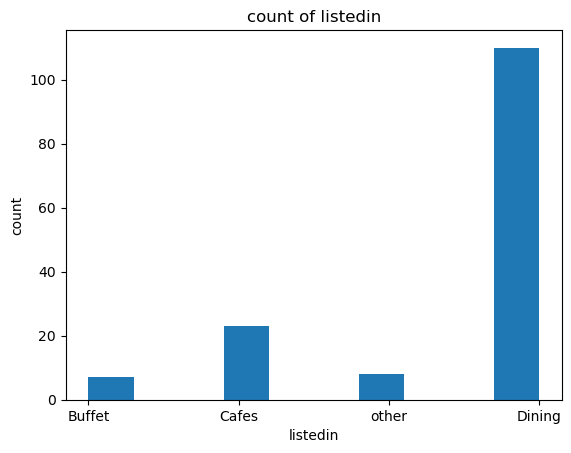

In [22]:
plt.hist(data['listed_in(type)'])
plt.title('count of listedin')
plt.xlabel('listedin')
plt.ylabel('count')
plt.show()

Conclusion: The majority of the restaurants fall into the dining category.


Text(0, 0.5, 'Votes')

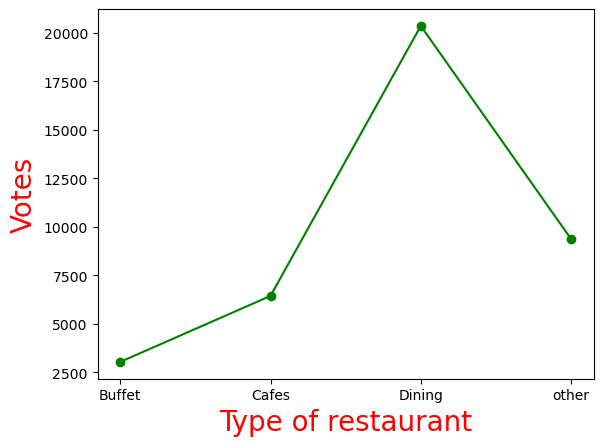

In [24]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)


In [25]:
max_votes= data['votes'].max()
Restaurant_with_max_votes= data.loc[data['votes'] == max_votes , 'name']
print("Restaurant(s) with the maximum votes:")
print(Restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


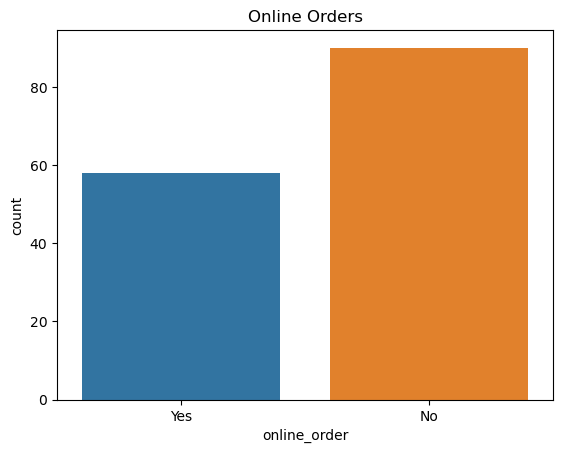

In [31]:
sns.countplot(x=data['online_order'])
plt.title('Online Orders')
plt.xlabel('online_order')
plt.ylabel('count')
plt.show()

Conclusion: This suggests that a majority of the restaurants do not accept online orders.

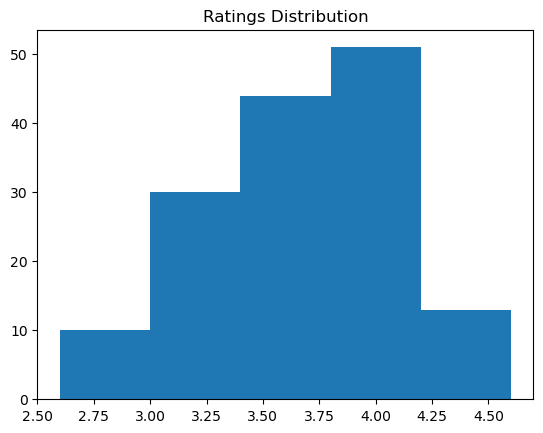

In [41]:
plt.hist(data['rate'], bins=5)
plt.title('Ratings Distribution')
plt.show()

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

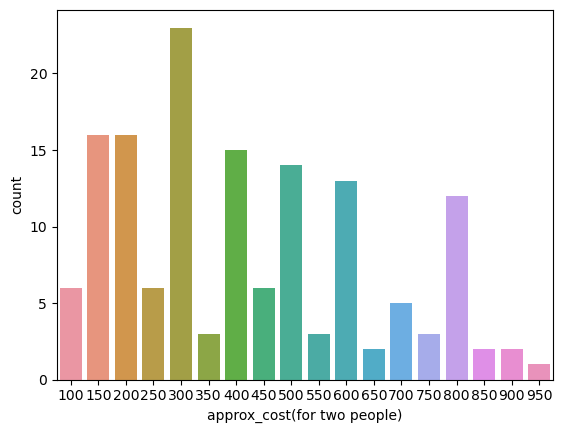

In [43]:
sns.countplot(x=data['approx_cost(for two people)'])

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

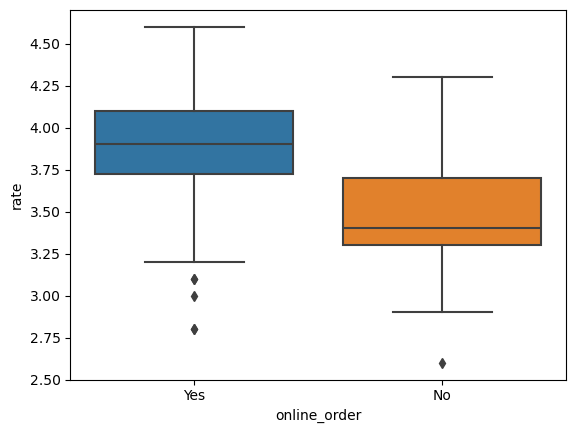

In [50]:
sns.boxplot( x= data['online_order'], y = data['rate'], data= data)

CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

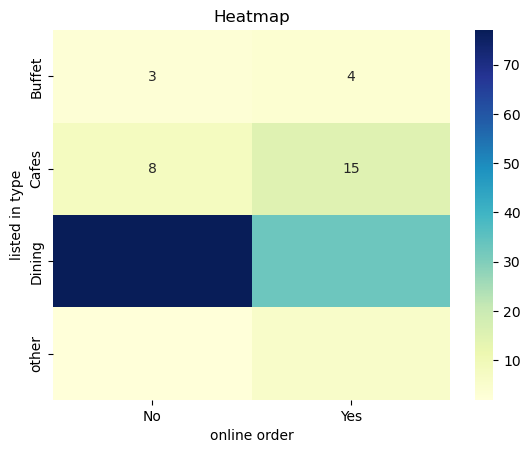

In [57]:
pivot_table = data.pivot_table(index='listed_in(type)', columns= 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('listed in type')
plt.show()

CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.